# Project_Name - Health_Insurance_Cross_Sell_Prediction
# Project_Type - Classification
# Contrubution - Individual
# Name - Ravikant Khandare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv(r"D:\FingerTip's\Panda's Class 1\TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
data.shape

(381109, 12)

In [7]:
# checking the sum of null value for each column
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [10]:
a=data

In [11]:
a.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [12]:
a["Driving_License"]=a["Driving_License"].apply(lambda x: "Yes" if x==1 else "No")
a["Previously_Insured"]=a["Previously_Insured"].apply(lambda x: "Yes" if x==1 else "No")

In [13]:
# To change data type float to int
a["Region_Code"]=a.Region_Code.astype(int)
a["Annual_Premium"]=a.Annual_Premium.astype(int)
a["Policy_Sales_Channel"]=a.Policy_Sales_Channel.astype(int)

In [14]:
# divide data in categorical nad numerical features
numeric_feature=a.select_dtypes(exclude="object")
categorical_feature=a.select_dtypes(include="object")

In [15]:
numeric_feature.head()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,28,40454,26,217,1
1,2,76,3,33536,26,183,0
2,3,47,28,38294,26,27,1
3,4,21,11,28619,152,203,0
4,5,29,41,27496,152,39,0


In [16]:
categorical_feature.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,Male,Yes,No,> 2 Years,Yes
1,Male,Yes,No,1-2 Year,No
2,Male,Yes,No,> 2 Years,Yes
3,Male,Yes,Yes,< 1 Year,No
4,Female,Yes,Yes,< 1 Year,No


In [17]:
sns.set_style(style=("white"))

<Axes: xlabel='Response', ylabel='count'>

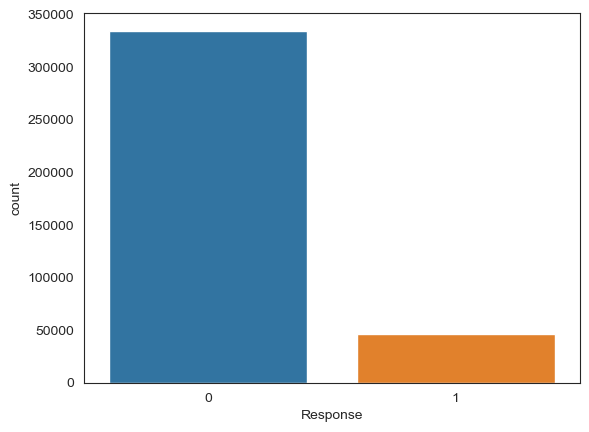

In [18]:
sns.countplot(x=data["Response"],data=data)

In [19]:
# count plot one is the best way to vusualize the value count distribution of a categorical variable

# out of the total respondent i.e.3.81.109 poeple only 12.25% of (46.710) peoplew ere interested in bying the 
 #vehical insurence from our company

# Are they any insides that lead to negative growth? justify the specific reason

#  the gained inside sheds light on the crossselling conversion rate of the company which is close to 
 # 12% the company can improve the conversion rate by taking steps to encorage people to buy  vehical 
    #insurance by offring some incentive / ease of application and claim settelment process cross selling 
    #might be an effective way to increase the profit since the customer aqqusition cost still remain 0,

<Axes: xlabel='Previously_Insured', ylabel='count'>

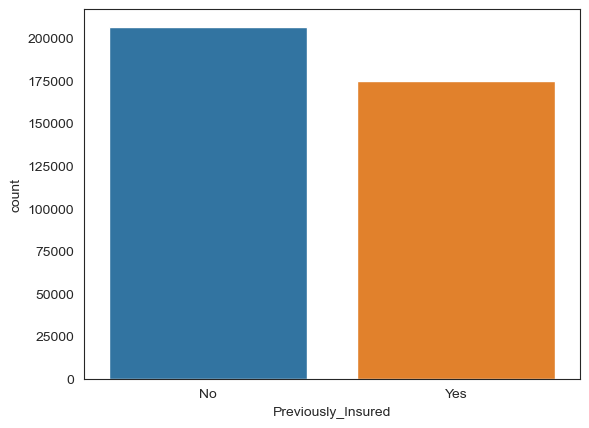

In [20]:
sns.countplot(x=data["Previously_Insured"],data=data)

In [21]:
# Out of total respodent i.e.3,81,109 people 54% (2,06,481) pleople had no previous vehical insurence

# are they any inside that lead to negative growth? justyfi with specific reason

# As the mejority of the people had no previous vehical insurence, the company gets access to an untapped market, 
# thus creating a positive business impact


<Axes: xlabel='Vehicle_Age', ylabel='count'>

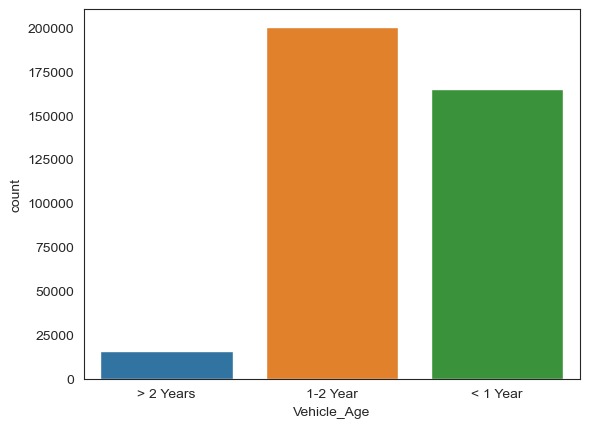

In [22]:
sns.countplot(x=data["Vehicle_Age"],data=data)

In [23]:
# count plot is the one of the best way to visualize the value count distribution of a categorical varriable

# The mejority of the vehical processed by the customer if in age range < 1 year or 1-2 year

# Are there any inside that lead to negative prowth ? justify with specific reason
 # This can have  a possitive impact because, as most of them are young vehical, the risk beared by the company is minimal also
    # the premium rate for newer vehicals are lower thus making it many it more likely for the people to buy,

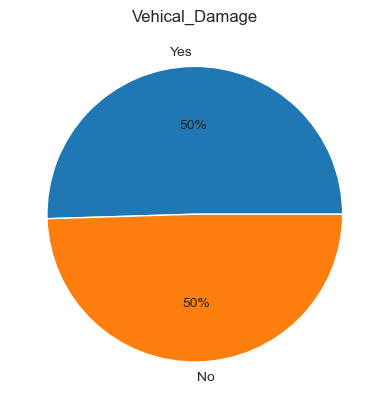

In [24]:
plt.pie(data["Vehicle_Damage"].value_counts(),labels=data["Vehicle_Damage"].value_counts().keys().tolist(),autopct="%.0f%%")
plt.title("Vehical_Damage")
plt.show()

In [25]:
# Half the helth insurence customers have previously damage vehical

# Are there any inside that lead to negative prowth ? justify with specific reason

# this might lead to negative business impact because 40-50% claimrate in vehical insurance 
# industries can have huge financial impact on the company,


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


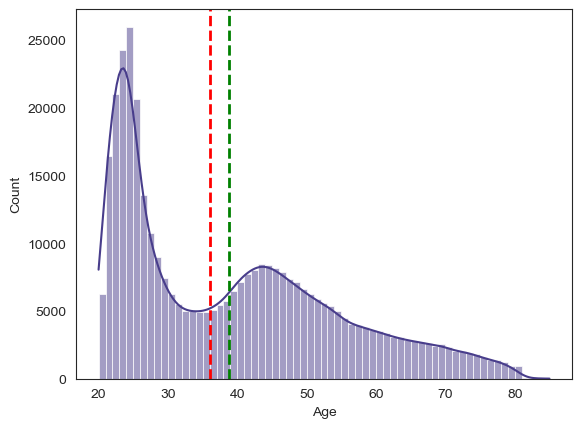

In [26]:
sns.histplot(data["Age"],kde=True,color="darkslateblue",bins=np.arange(data["Age"].min(),data["Age"].max()+1))
plt.axvline(data["Age"].mean(),color="g",linestyle="dashed",linewidth=2)
plt.axvline(data["Age"].median(),color="red",linestyle="dashed",linewidth=2)

In [27]:
# histogram along with the KDE line lets us visualize and the distributin of the future , the mean and median dashed line also gives us the level of skevness

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


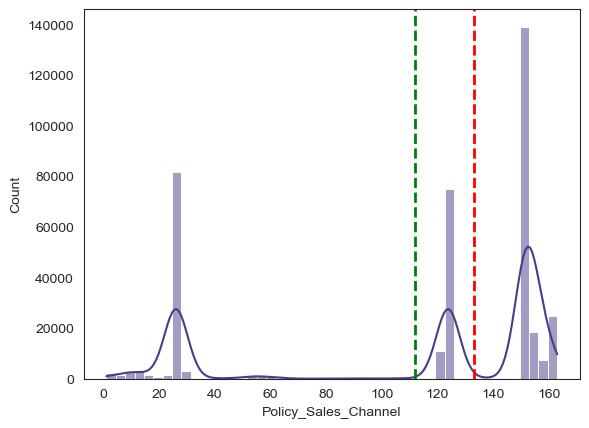

In [28]:
sns.histplot(x=data["Policy_Sales_Channel"],kde=True,color="darkslateblue")
plt.axvline(data["Policy_Sales_Channel"].mean(),color="g",linestyle="dashed",linewidth=2)
plt.axvline(data["Policy_Sales_Channel"].median(),color="red",linestyle="dashed",linewidth=2)

In [29]:
data["Policy_Sales_Channel"].value_counts().head(20)

Policy_Sales_Channel
152    134784
26      79700
124     73995
160     21779
156     10661
122      9930
157      6684
154      5993
151      3885
163      2893
13       1865
25       1848
7        1598
8        1515
30       1410
55       1264
155      1234
11       1203
1        1074
52       1055
Name: count, dtype: int64

<Axes: >

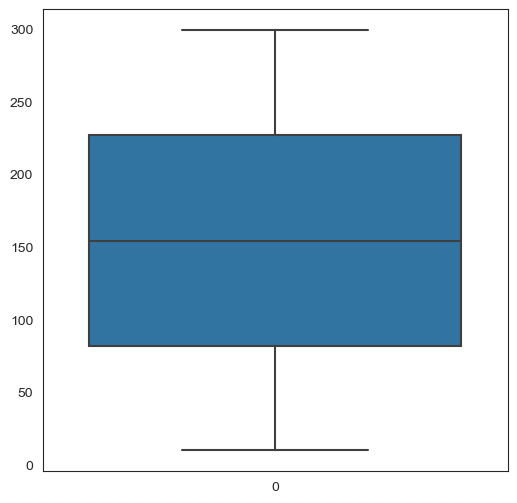

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Vintage"])

In [31]:
# the box plot chart helps in getting an all around view of price distributin across neighbourhood group

# Hypothesis Testing

In [32]:
age_sample=data["Age"].sample(500)
age_mean=np.mean(age_sample)
age_std=np.std(age_sample)

In [33]:
ts=(age_mean-30)/(age_std/(np.sqrt(500)))
print(ts)

13.425368088166922


In [34]:
# calculating the probability

prob_z = norm.cdf(13.48,0,1)
print(prob_z)


# print p value

p1=1-prob_z
print(p1)

1.0
0.0


In [35]:
# perform statistical test to obtain p-value

ap_sample = data["Annual_Premium"].sample(50)
S2 = (np.std(ap_sample))**2

In [36]:
# compute test statistics

ts3 = (49*S2)/(10000*10000)
print(ts3)

169.84371493913608


In [37]:
# calculating the probabilit
prob = chi2.cdf(158.82,49)
print(prob)

0.9999999999998384


# Feature Engineering & Data Preprocessing

# Handling Outliers

<Axes: xlabel='Annual_Premium'>

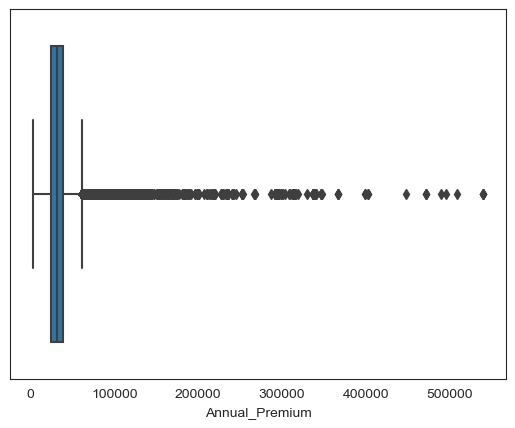

In [38]:
sns.boxplot(x=data["Annual_Premium"])

In [39]:
# finding the IQR


percentile25 = data["Annual_Premium"].quantile(0.25)
percentile75 = data["Annual_Premium"].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 * iqr
lower_limit = percentile25 -1.5 * iqr

In [40]:
# capping


data["Annual_Premium"] = np.where(
data["Annual_Premium"]>upper_limit,
upper_limit,
np.where(
data["Annual_Premium"]<lower_limit,
lower_limit,
data["Annual_Premium"]))

<Axes: xlabel='Annual_Premium'>

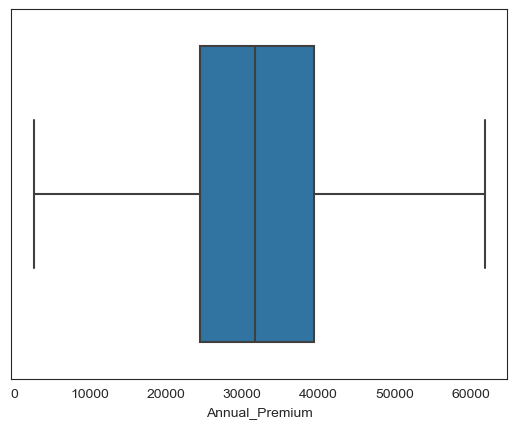

In [41]:
sns.boxplot(x=data["Annual_Premium"])

# Categorical Encoding

In [42]:
data = pd.get_dummies(data,drop_first=True,sparse=True)

In [43]:
data.head()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_Yes,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,44,28,40454.0,26,217,1,True,True,False,False,True,True
1,2,76,3,33536.0,26,183,0,True,True,False,False,False,False
2,3,47,28,38294.0,26,27,1,True,True,False,False,True,True
3,4,21,11,28619.0,152,203,0,True,True,True,True,False,False
4,5,29,41,27496.0,152,39,0,False,True,True,True,False,False


In [44]:
data.drop("id",axis=1,inplace=True)

In [45]:
data.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_Yes,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28,40454.0,26,217,1,True,True,False,False,True,True
1,76,3,33536.0,26,183,0,True,True,False,False,False,False
2,47,28,38294.0,26,27,1,True,True,False,False,True,True
3,21,11,28619.0,152,203,0,True,True,True,True,False,False
4,29,41,27496.0,152,39,0,False,True,True,True,False,False


# Textual Data Preprocessing

# Expand Contraction

In [46]:
contraction = {"i=I'm":"I am",
              "Can't":"Cannot",
              "Won't":"Will not",
              }
def expand_contraction(text):
    words = text.split()
    expanded_words = [contraction.get(word,word) for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text

# Example Usage
contracted_text = "I'm going to the store. It won't take long."
expanded_text = expand_contraction (contracted_text)
print(expanded_text)

I'm going to the store. It won't take long.


# lower casing

In [47]:
text = "The Quick Born FoxJUMPS Over The LAZY Dog"
lower_case_text = text.lower()
print(lower_case_text)

the quick born foxjumps over the lazy dog


# Removing_text

In [48]:
import string

In [49]:
text = "Hello,How are you"
a = text.translate(str.maketrans("","",string.punctuation))
print(a)

HelloHow are you


# Feature Manipulation & selection

In [50]:
# Manipulatio Features to minimize feature correlation and creat new features
data["Driving_License_Yes"].value_counts()

Driving_License_Yes
True     380297
False       812
Name: count, dtype: int64

# Feature Selection

In [51]:
data.head(1)

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_Yes,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28,40454.0,26,217,1,True,True,False,False,True,True


In [52]:
# select your features wisely to avoid overfitting
# Dropping the "Driving_Licence_Yes" columns

data.drop("Driving_License_Yes",axis=1,inplace=True)

In [53]:
data.head(1)

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28,40454.0,26,217,1,True,False,False,True,True


In [54]:
# Handling imbalanced Dataset ( if needed)
# Target variable countplot

<Axes: xlabel='Response', ylabel='count'>

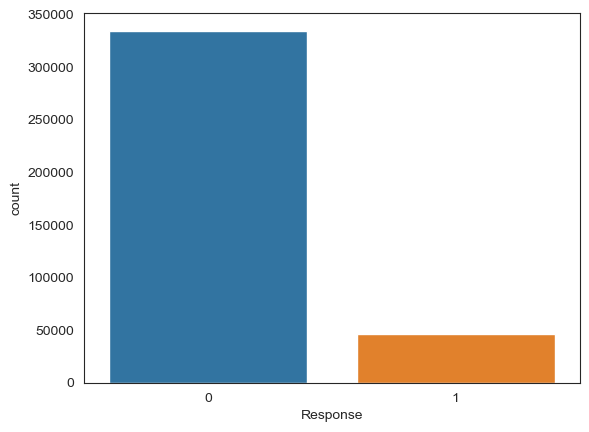

In [55]:
sns.countplot(x=data["Response"],data=data)

In [56]:
# define x and y veriables

x=data.drop(["Response"],axis=1)
y=data["Response"]

In [57]:
# Visualized the balanced dataset


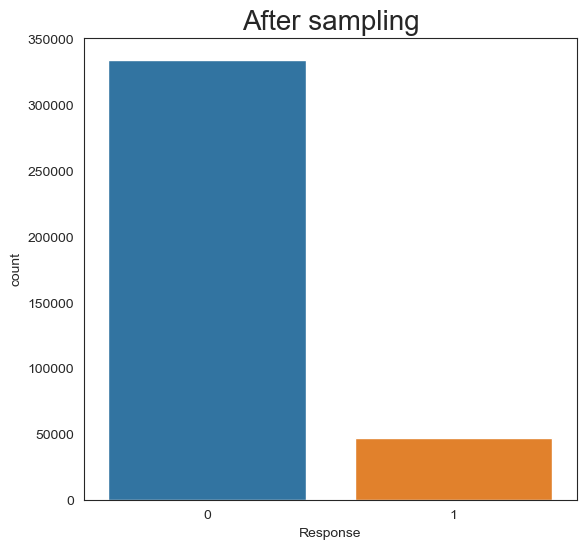

In [58]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(x=data["Response"],data=data)
plt.title("Before sampling",fontsize=20)
plt.subplot(1,2,1)
plt.title("After sampling",fontsize=20)
plt.show()

# Thank You